<a href="https://colab.research.google.com/github/wksmirnowa/deeplearning_homeworks/blob/master/Smirnova_HW2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import requests
import shutil
import gzip

from typing import Dict, List, Tuple

from tqdm import tqdm

import pandas as pd
from sklearn.model_selection import train_test_split


class Downloader:

    URLS = {
        'single': [
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Appliances.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Arts_Crafts_and_Sewing.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Automotive.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Baby.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Beauty.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Cell_Phones_and_Accessories.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Clothing_Shoes_and_Jewelry.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Electronics.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Grocery_and_Gourmet_Food.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Health_and_Personal_Care.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Home_and_Kitchen.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Industrial_and_Scientific.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Musical_Instruments.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Office_Products.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Patio_Lawn_and_Garden.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Pet_Supplies.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Software.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Sports_and_Outdoors.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Tools_and_Home_Improvement.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Toys_and_Games.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/qa_Video_Games.json.gz'
        ],
        'multiple': [
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Automotive.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Baby.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Beauty.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Cell_Phones_and_Accessories.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Clothing_Shoes_and_Jewelry.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Electronics.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Grocery_and_Gourmet_Food.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Health_and_Personal_Care.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Home_and_Kitchen.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Musical_Instruments.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Office_Products.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Patio_Lawn_and_Garden.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Pet_Supplies.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Sports_and_Outdoors.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Tools_and_Home_Improvement.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Toys_and_Games.json.gz',
            'http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Video_Games.json.gz'
        ]
    }

    def __init__(self,
                 data_path: str,
                 override: bool = False,
                 sleep_time: float = 0.05,
                 verbose: bool = True):

        self.data_path = data_path
        self.override = override
        self.sleep_time = sleep_time
        self.verbose = verbose

    @staticmethod
    def make_dir(path: str, override: bool = False):
        if override:
            shutil.rmtree(path, ignore_errors=True)
        try:
            os.mkdir(path)
        except FileExistsError:
            pass

    @staticmethod
    def download_file(url: str, save_path: str, verbose: bool = False, chunk_size: int = 8192):
        try:
            filename = save_path.split('/')[-1]
            with requests.get(url, stream=True) as request:
                request.raise_for_status()
                with open(save_path, 'wb') as file_object:
                    for chunk in tqdm(request.iter_content(chunk_size=chunk_size),
                                      desc=f'Download {filename}',
                                      disable=not verbose):
                        if chunk:
                            file_object.write(chunk)
        except KeyboardInterrupt as exception:
            os.remove(save_path)
            raise exception
        except Exception as exception:
            os.remove(save_path)
            raise exception

    def run(self):

        self.make_dir(self.data_path, override=self.override)

        for key in self.URLS:
            for url in tqdm(self.URLS[key], desc=key, disable=not self.verbose):
                filename = key + '_' + url.split('/')[-1]

                time.sleep(self.sleep_time)

                file_path = os.path.join(self.data_path, filename)

                if not os.path.isfile(file_path):
                    self.download_file(url=url, save_path=file_path, verbose=False)


class Parser:

    BAD_CATEGORIES = [
        'electronics',
        'software',
        'appliances',
        'industrial and scientific',
        'musical instruments',
        'arts crafts and sewing',
        'video games',
        'toys and games',
        'clothing shoes and jewelry',
        'home and kitchen',
        'health and personal care',
        'tools and home improvement',
        'patio lawn and garden'
    ]

    def __init__(self,
                 data_path: str,
                 is_question_classification: bool = True,
                 train_samples: int = 250_000,
                 valid_samples: int = 50_000,
                 lower_threshold: int = 5,
                 upper_threshold: int = 512):

        self.data_path = data_path
        self.is_question_classification = is_question_classification

        self.train_samples = train_samples
        self.valid_samples = valid_samples

        self.lower_threshold = lower_threshold
        self.upper_threshold = upper_threshold

    @staticmethod
    def parse_filename(file_path: str) -> str:
        category = file_path.split('/')[-1].split('.')[0]

        category = category.lower().replace('qa_', '')
        category = category.replace('single_', '').replace('multiple_', '')
        category = category.replace('_', ' ')

        return category

    @staticmethod
    def prepare_text(text: str) -> str:
        text = text.lower().encode('utf-8', 'ignore').decode('utf-8', 'ignore')

        return text

    def filter_sample(self, sample: Dict[str, str]) -> bool:

        if not (self.lower_threshold <= len(sample['question']) <= self.upper_threshold):
            return False

        if not (self.lower_threshold <= len(sample['response']) <= self.upper_threshold):
            return False

        if sample['category'] in self.BAD_CATEGORIES:
            return False

        return True

    def parse_single_sample(self,
                            sample: Dict,
                            category: str,
                            with_types: bool = False) -> List[Dict[str, str]]:

        result_sample = {
            'question': self.prepare_text(sample['question']),
            'response': self.prepare_text(sample['answer']),
            'category': category
        }

        if with_types:
            result_sample['question_type'] = sample['questionType']
            result_sample['answer_type'] = sample['answerType']

        result_sample = [result_sample] if self.filter_sample(result_sample) else list()

        return result_sample

    def parse_multiple_sample(self,
                              sample: Dict,
                              category: str) -> List[Dict[str, str]]:

        result_samples: List[Dict[str, str]] = list()

        for question_data in sample['questions']:
            for answer_data in question_data['answers']:
                parsed_sample = {
                    'question': self.prepare_text(question_data['questionText']),
                    'response': self.prepare_text(answer_data['answerText']),
                    'category': category,
                }
                if self.filter_sample(parsed_sample):
                    result_samples.append(parsed_sample)

        return result_samples

    def get_file_paths(self):

        return [os.path.join(self.data_path, file)
                for file in os.listdir(self.data_path)
                if file.endswith('.json.gz')]

    def read_data(self) -> List[Dict[str, str]]:

        file_paths = self.get_file_paths()

        data: List[Dict[str, str]] = list()

        for file_path in tqdm(file_paths, desc='Reading'):
            with gzip.open(file_path) as file_object:
                for sample in file_object:
                    sample = eval(sample)
                    category = self.parse_filename(file_path)

                    if 'single' in file_path:
                        data.extend(self.parse_single_sample(sample, category))
                    elif 'multiple' in file_path:
                        data.extend(self.parse_multiple_sample(sample, category))

        return data

    def run(self) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:

        data = pd.DataFrame(self.read_data())

        subset = ['question']

        if not self.is_question_classification:
            subset.append('response')

        data = data.drop_duplicates(subset=subset)

        data = data.sample(frac=1)

        if self.train_samples + self.valid_samples >= data.shape[0]:
            raise ValueError('Sum of train_samples and valid_samples must be less than length of data')

        data, valid = train_test_split(data, stratify=data.category, test_size=self.valid_samples)

        unlabeled, train = train_test_split(data, stratify=data.category, test_size=self.train_samples)

        unlabeled = unlabeled[['question', 'response']]

        unlabeled.reset_index(inplace=True, drop=True)
        train.reset_index(inplace=True, drop=True)
        valid.reset_index(inplace=True, drop=True)

        return unlabeled, train, valid

In [ ]:
import math
import numpy as np

from tqdm import tqdm
#from tqdm import tqdm_notebook as tqdm

import torch

import zipfile

import seaborn as sns

# from data import Downloader, Parser

### Загружаем файл с эмбеддингами для английского языка
Они нам понадобятся чуть позже.  
Для других языков можете найти здесь: https://fasttext.cc/docs/en/crawl-vectors.html

In [ ]:
# раскомментируйте и скачайте
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2020-12-13 13:11:56--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  23.5MB/s    in 29s     

2020-12-13 13:12:25 (22.7 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [ ]:
# путь к данным
data_path = './data/'

### Читалка данные
Не стоит вдаваться в подробности, просто эта штука скачивает данные, затем парсит и делает из них три датасета:
- тренировочный
- валидационный
- неразмеченный

Неразмеченные данные необазятельны, но могут вам понадобиться, например, для языковой модели или улучшения эмбеддингов.

In [ ]:
downloader = Downloader(data_path=data_path)

In [ ]:
downloader.run()

multiple: 100%|██████████| 17/17 [00:19<00:00,  1.15s/it]


In [ ]:
parser = Parser(data_path=data_path)

In [ ]:
unlabeled, train, valid = parser.run()

Reading: 100%|██████████| 38/38 [02:18<00:00,  3.66s/it]


### Посмотрим на датасеты

In [ ]:
unlabeled

,question,response
0,how sturdy is the base of the inner carriage w...,your 26lb dog will sitvery comfortably in the ...
1,adjustable blade: can anyone give me some tips...,the 30 and 40 are best for under the feet. 10 ...
2,what is the height and width of the canister f...,"hi! for this particular one (xl), its about 8x..."
3,is it easy to take it off when it's not being ...,it's very simple to install and remove. it tak...
4,will this co witness with the iron sights of a...,absolutely. i've got mine on a tavor and co-wi...
...,...,...
137275,where is the tab,not sure exactly what tab you're referring to....
137276,is there a pocket for radio antenna,no. it doesn't fit exactly snugly and you have...
137277,"does this model ""curt 13534 class iii receiver...",we have a 2010 highlander. it's fits are full ...
137278,does this need to be assembled?,yes but very simple


In [ ]:
train

,question,response,category
0,will this cover fit a star trak spinner blake ...,can't give you a specific answer to your quest...,sports and outdoors
1,is there an error on the sizing chart? women's...,i'm female with pretty decent sized hands (i w...,sports and outdoors
2,does this fit on the nexus iii?,if you go under phone info under settings it s...,cell phones and accessories
3,my husband and i are both getting one. would t...,yes i believe so,cell phones and accessories
4,is this a package of one or what's the quantity?,"package of one, but they work great. get the b...",sports and outdoors
...,...,...,...
249995,is the foam on the sm-med belt as large in bac...,they are both made the same shape and adjust c...,sports and outdoors
249996,would there be a problem running in cold weath...,"please disregard my ""yes"" answer! i hit the wr...",automotive
249997,does this item come with a wiring diagram?,"it should come with a wiring diagram. however,...",automotive
249998,"besides the exterior color, is there any diffe...",not as far as i can tell. i've owned the plati...,cell phones and accessories


In [ ]:
valid

,question,response,category
0,will this product work on a 2007 toyota fj cru...,this should fit your 2007 reciever as toyota b...,automotive
1,this may be a stupid question... how can you t...,"get ur car facing a wall with ur lights on, st...",automotive
2,are the spoons coated with a lacquer or any ot...,"no they are clean, buffed smooth bamboo",baby
3,will this remote work with a 1998 chevy lumina?,don't know you would have to take to the deale...,automotive
4,will these riser fit a 2000 suzuki 1500lc and ...,hello believe it will but instead 4.5 in i wou...,automotive
...,...,...,...
49995,"is this for the complete front set, drivers an...","yes, both sides.",automotive
49996,i want to put this in my basement which is onl...,"87"" tall with lat pull.",sports and outdoors
49997,can this fit 2003 gmc yukon?,it jusy so happens that the yukon and the aval...,automotive
49998,does this cable provide power to the host devi...,no power to host,cell phones and accessories


## Задача
Классифицировать поле question в одну из категорий в поле category.  
Это данные с сервиса Amazon QA, то есть такой сервис, на котором можно задать вопрос и получить ответ от других пользователей.

Идея задачи такая: давайте поможем клиенту определить в какую категорию выложить его вопрос, чтобы быстрее получить максимально релевантный ответ.

### Перевод класса в индекс
Мы сделаем некоторый маппер, который текст класса переводит в конкретный уникальный индекс. Нам это понадобиться, потому что наша 
модель работает не напрямую с классом, а с его индексом.

In [ ]:
# проверим, что в трейне и валидации одинаковые категории
set(train.category.unique().tolist()) == set(valid.category.unique().tolist())

True

In [ ]:
unique_categories = set(train.category.unique().tolist() + valid.category.unique().tolist())

In [ ]:
category2index = {category: index for index, category in enumerate(unique_categories)}

In [ ]:
category2index

{'automotive': 1,
 'baby': 4,
 'beauty': 6,
 'cell phones and accessories': 7,
 'grocery and gourmet food': 0,
 'office products': 5,
 'pet supplies': 2,
 'sports and outdoors': 3}

In [ ]:
train['target'] = train.category.map(category2index)
valid['target'] = valid.category.map(category2index)

In [ ]:
train

,question,response,category,target
0,will this work for a 2012 forrester,as far as i know it fits wrx & other impreza v...,automotive,1
1,will these fit a 2003 jeep grand cherokee limi...,yes thei well fit from 1999 to 2004,automotive,1
2,what are the full ingredients? they hide the i...,"hi kimi, here are the ingredients right off th...",beauty,6
3,can you mix and match the tops of these with t...,"hi, you can use natural tops in the classic bo...",baby,4
4,can this fit a bunny?,if your bunny can sit on the palms of your han...,pet supplies,2
...,...,...,...,...
249995,does this machine require a distinctive ring f...,answer is no. wouldn't recommend this machine ...,office products,5
249996,will this fit on my hd fire d025 model.,"mine is a 20012 model supposed to fit, haven't...",cell phones and accessories,7
249997,do the batteries really last 20 hours as it sa...,they do last a long time. i haven't timed it t...,baby,4
249998,will this work for a 5yr. old dog? we just mov...,it's hard to say. if you place it in her favor...,pet supplies,2


### Torch Dataset, DataLoader

Очень важная абстракция для торча.
Мы всегда будем ее использовать, чтобы работать с данными.

Dataset - класс, от которого нужно наследоваться, чтобы написать свой обработчик данных. Внутри него нужно реализовать два метода, 
о которых будет чуть ниже. То есть в данном классе вы описывает как нужно преобразовать ваши данные в торчовый формат. Перевести тексты 
в индексы слов и тд.

DataLoader - класс, который будет за вас семплировать данные батчами. Это итератор, поэтому формат работы с ним примерно такой:
```python
for batch in data_loader:
    ...
```
То есть на каждой итерации отдается по одному батчу данных. Итерирование заканчивается, когда вы пройдете все батчи.

Зачем нужны эти абстракции? Чтобы упростить и унифицировать работу с данными.
Вообще вы можете реализовать что-то свое, но это упрощение данной задачи.

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
# игрушечный датасет
# 121535 примера, 4 фичи, 3 класса
some_data_x = np.random.rand(121535, 4)
some_data_y = np.random.randint(3, size=(121535,))

In [ ]:
# просто рандомные цифры
some_data_x[:10]

array([[0.45114478, 0.12726896, 0.92298367, 0.78270306],
       [0.55412887, 0.77979962, 0.89858608, 0.41071332],
       [0.74059715, 0.95425451, 0.92538179, 0.31710288],
       [0.31468359, 0.55619588, 0.32771464, 0.03002843],
       [0.13965216, 0.88077501, 0.35843223, 0.3753262 ],
       [0.93549061, 0.72975182, 0.94839808, 0.03079833],
       [0.99642983, 0.88171835, 0.13771623, 0.04993491],
       [0.37474066, 0.51888175, 0.99834781, 0.77100112],
       [0.54219263, 0.14708729, 0.9824675 , 0.13479854],
       [0.61677359, 0.94378157, 0.99189723, 0.91631156]])

In [ ]:
# и классы
some_data_y

array([0, 1, 1, ..., 0, 1, 1])

### Пример надобности
Для обучения модели вам нужно подавать в нее батчи данных. Как бы могли это реализовать, если бы у нас не было Dataset и DataLoader

In [ ]:
batch_size = 16

for i_batch in range(math.ceil(some_data_x.shape[0] / batch_size)):
    
    x_batch = some_data_x[i_batch * batch_size:(i_batch + 1) * batch_size]
    y_batch = some_data_y[i_batch * batch_size:(i_batch + 1) * batch_size]
    
    x_batch = torch.tensor(x_batch)
    y_batch = torch.tensor(y_batch)
    
    break

In [ ]:
x_batch

tensor([[0.7119, 0.8517, 0.2407, 0.4550],
        [0.6864, 0.2000, 0.7234, 0.3851],
        [0.8856, 0.4531, 0.0676, 0.9330],
        [0.6208, 0.0415, 0.4030, 0.7490],
        [0.3623, 0.9274, 0.9338, 0.6054],
        [0.0812, 0.7828, 0.9597, 0.3047],
        [0.0368, 0.0206, 0.7144, 0.5855],
        [0.6783, 0.6269, 0.7755, 0.6417],
        [0.1581, 0.5528, 0.6892, 0.5938],
        [0.3509, 0.1936, 0.2669, 0.0018],
        [0.0321, 0.6997, 0.6264, 0.9488],
        [0.7963, 0.0756, 0.4320, 0.5841],
        [0.7964, 0.5473, 0.8241, 0.4490],
        [0.4853, 0.6640, 0.0951, 0.9670],
        [0.1820, 0.5911, 0.1110, 0.7809],
        [0.9437, 0.4779, 0.0691, 0.4386]], dtype=torch.float64)

In [ ]:
x_batch.shape, y_batch.shape

(torch.Size([16, 4]), torch.Size([16]))

Это достаточно простой пример. Мы смогли справиться сами, но почти всегда обработка данных для подачи ее в модель делается сложнее. 
И некоторые вещи часто нужны более одного раза, например, если мы хотим каждую эпоху шафлить наши данные, чтобы получать разные батчи.
Мы сможем это сделать, но для этого нам придется тащить с собой некоторый код из проекта в проект. К тому же совместная разработка или 
просто чтение чужого кода сильно упрощается, когда вы используете унифицированные форматы.

### Перейдем к Dataset
И обернем наши данные в этот обработчик

In [ ]:
class ToyDataset(Dataset):
    
    def __init__(self, data_x, data_y):
        
        super().__init__()
        
        self.data_x = data_x
        self.data_y = data_y
        
    def __len__(self):
        
        # нужно обязательно определить эту функцию
        # должна возвращать размер датасета
        # нужен для DataLoader, чтобы семплировать батчи
        
        return len(self.data_x)
    
    def __getitem__(self, idx):
        
        # еще нужно определить этот метод
        # то есть как мы будем доставать наши данные по индексу
        
        return self.data_x[idx], self.data_y[idx]

In [ ]:
some_dataset = ToyDataset(some_data_x, some_data_y)

In [ ]:
some_dataset[5], some_dataset[467]

((array([0.93549061, 0.72975182, 0.94839808, 0.03079833]), 0),
 (array([0.97886092, 0.25552591, 0.99361811, 0.52953738]), 1))

### Кажется, что смысла в этом нет, но это самый простой пример

### DataLoader
В него мы можем задать некоторые параметры, например, батч сайз и нужно ли шафлить каждый новый проход по данным эти самые данные, 
чтобы получать разные батчи, то есть по разному компоновать эти батчи

In [ ]:
some_loader = DataLoader(some_dataset, batch_size=16, shuffle=True)

In [ ]:
for x, y in some_loader:
    break
    
x

tensor([[0.6551, 0.3867, 0.5675, 0.7294],
        [0.1338, 0.0290, 0.2512, 0.4685],
        [0.2506, 0.6126, 0.8329, 0.3481],
        [0.7149, 0.3398, 0.4547, 0.7465],
        [0.9770, 0.2817, 0.5351, 0.6230],
        [0.0654, 0.5411, 0.1509, 0.3829],
        [0.4329, 0.1012, 0.4000, 0.7173],
        [0.2099, 0.7756, 0.3426, 0.0143],
        [0.6119, 0.6940, 0.6834, 0.5823],
        [0.5777, 0.0373, 0.6872, 0.8046],
        [0.1554, 0.0418, 0.2656, 0.7100],
        [0.0586, 0.3905, 0.3946, 0.9439],
        [0.3097, 0.7043, 0.4778, 0.2304],
        [0.1156, 0.7207, 0.3236, 0.3073],
        [0.6191, 0.7882, 0.2373, 0.2248],
        [0.0439, 0.3459, 0.7047, 0.4166]], dtype=torch.float64)

In [ ]:
x.shape

torch.Size([16, 4])

In [ ]:
for x, y in some_loader:
    pass

len(x)

15

In [ ]:
# почему 15?
# потому что количество наших данных нацело не делится на 16
# и поэтому последний батч меньше 16-ти
len(some_dataset) % 16

15

### Усложним обработчик

In [ ]:
class ToyDataset(Dataset):
    
    def __init__(self, data_x, data_y):
        
        super().__init__()
        
        self.data_x = data_x
        self.data_y = data_y
        
    def __len__(self):
        
        # нужно обязательно определить эту функцию
        # должна возвращать размер датасета
        # нужен для DataLoader, чтобы семплировать батчи
        
        return len(self.data_x)
    
    @staticmethod
    def pow_features(x, n=2):
        
        return x ** n
    
    @staticmethod
    def log_features(x):
        
        return np.log(x)
    
    def __getitem__(self, idx):
        
        # еще нужно определить этот метод
        # то есть как мы будем доставать наши данные по индексу
        
        x = self.data_x[idx]
        
        # внутри датасета мы можем делать все что угодно с нашими данными
        # например выше определим функции, которые добавляют степенные фичи
        x_p_2 = self.pow_features(x, n=2)
        x_p_3 = self.pow_features(x, n=3)
        # и еще возьмем логарифмические фичи
        x_log = self.log_features(x)
        
        # сконкатенируем наши фичи
        x = np.concatenate([x, x_p_2, x_p_3, x_log])
        
        y = self.data_y[idx]
        
        return x, y

In [ ]:
toy_dataset = ToyDataset(some_data_x, some_data_y)

In [ ]:
toy_loader = DataLoader(dataset=toy_dataset, batch_size=128)

In [ ]:
for x, y in toy_loader:
    break

In [ ]:
x.shape

torch.Size([128, 16])

In [ ]:
# заметим, что мы сразу получаем торчовый формат данных, который получился из автоматического преобразования из numpy
x

tensor([[ 0.7119,  0.8517,  0.2407,  ..., -0.1605, -1.4240, -0.7874],
        [ 0.6864,  0.2000,  0.7234,  ..., -1.6095, -0.3238, -0.9543],
        [ 0.8856,  0.4531,  0.0676,  ..., -0.7916, -2.6935, -0.0694],
        ...,
        [ 0.6867,  0.5533,  0.8899,  ..., -0.5919, -0.1166, -0.2364],
        [ 0.3468,  0.2164,  0.4582,  ..., -1.5307, -0.7804, -0.5034],
        [ 0.6009,  0.9150,  0.6305,  ..., -0.0888, -0.4612, -0.5679]],
       dtype=torch.float64)

In [ ]:
y

tensor([1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2,
        2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1,
        0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1,
        0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1,
        2, 0, 2, 0, 0, 2, 1, 2])

In [ ]:
# сделаем небольшую модель и посчитаем лосс

model = torch.nn.Sequential(torch.nn.Linear(16, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3))

criterion = torch.nn.CrossEntropyLoss()

with torch.no_grad():

    prediction = model(x.float())

    loss = criterion(prediction, y)
    
loss.item()

1.109734058380127

### Сделаем датасет для наших текстовых данных
Будем отдавать строку и таргет по индексу

In [ ]:
class TextClassificationDataset(Dataset):
    
    def __init__(self, texts, targets):
        super().__init__()
        
        self.texts = texts
        self.targets = targets
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, index):
        
        text = self.texts[index]
        target = self.targets[index]
        
        return text, target

In [ ]:
# подготовим данные
train_x = list(train.question)
train_y = list(train.target)

valid_x = list(valid.question)
valid_y = list(valid.target)

In [ ]:
train_dataset = TextClassificationDataset(texts=list(train.question), targets=list(train.target))

In [ ]:
# семплируем данные
text, target = train_dataset[0]

In [ ]:
text

'i have been unable to get it to adhere to my tile wall for more then a few minutes before it falls down. has anyone been able to do this successfully?'

In [ ]:
target

0

### Смысл обработчика
Состоит в том, что нам нужно преобразовать наши данные в формат, который мы уже сможем передать в модель.
Сейчас у нас строки, а торч ничего не знает про строки, ему нужны тензоры.

### Загружаем эмбеддинги
Чтобы работать с текстовыми данными мы можем разбить наши строки на слова, а слова перевести в вектора. Откуда нам взять эти вектора?
Мы говорили про такой метод как word2vec и в начале этой тетрадки загружали файл с этими самыми векторами.

In [ ]:
import zipfile
import numpy as np

from tqdm import tqdm

In [ ]:
def load_embeddings(zip_path, filename, pad_token='PAD', max_words=100_000, verbose=True):
    
    vocab = dict()
    embeddings = list()

    with zipfile.ZipFile(zip_path) as zipped_file:
        with zipped_file.open(filename) as file_object:

            vocab_size, embedding_dim = file_object.readline().decode('utf-8').strip().split()

            vocab_size = int(vocab_size)
            embedding_dim = int(embedding_dim)
            
            # в файле 1 000 000 слов с векторами, давайте ограничим для простоты этот словарь
            max_words = vocab_size if max_words <= 0 else max_words
            
            # добавим пад токен и эмбеддинг в нашу матрицу эмбеддингов и словарь
            vocab[pad_token] = len(vocab)
            embeddings.append(np.zeros(embedding_dim))

            progress_bar = tqdm(total=max_words, disable=not verbose)

            for line in file_object:
                parts = line.decode('utf-8').strip().split()

                token = ' '.join(parts[:-embedding_dim]).lower()
                
                if token in vocab:
                    continue
                
                word_vector = np.array(list(map(float, parts[-embedding_dim:])))

                vocab[token] = len(vocab)
                embeddings.append(word_vector)

                progress_bar.update()
                
                if len(vocab) == max_words:
                    break

            progress_bar.close()

    embeddings = np.stack(embeddings)
    
    return vocab, embeddings

In [ ]:
vocab, embeddings = load_embeddings('./wiki-news-300d-1M.vec.zip', 'wiki-news-300d-1M.vec', max_words=100_000)

100%|█████████▉| 99999/100000 [00:10<00:00, 9372.94it/s]


### Посмотрим на ближайших соседей слова по эмбеддингам

In [ ]:
index2token = {index: token for token, index in vocab.items()}

In [ ]:
emb_norms = np.linalg.norm(embeddings, axis=1)

In [ ]:
def get_k_nearest_neighbors(word, embeddings, emb_norms, vocab, index2token, k=5):
    
    if word not in vocab:
        print('Not in vocab')
        return
    
    word_index = vocab[word]

    word_vector = embeddings[word_index]
    word_vector = np.expand_dims(word_vector, 0)

    scores = (word_vector @ embeddings.T)[0]
    
    # переводим в косинусы, поделив на нормы векторов
    # эпсилон 1e-6 для того, чтобы не делить на 0
    scores = scores / (emb_norms + 1e-6) / emb_norms[word_index]
    
    # 1:k+1 потому что первый вариант это само слово
    for idx in scores.argsort()[::-1][1:k+1]:
        print(f'Слово {index2token[idx]} близко на {scores[idx]:.2f} к слову {word}')

In [ ]:
get_k_nearest_neighbors('anna', embeddings, emb_norms, vocab, index2token)

Слово maria близко на 0.73 к слову anna
Слово emma близко на 0.66 к слову anna
Слово kristina близко на 0.65 к слову anna
Слово laura близко на 0.65 к слову anna
Слово emily близко на 0.65 к слову anna


In [ ]:
get_k_nearest_neighbors('mom', embeddings, emb_norms, vocab, index2token)

Слово dad близко на 0.85 к слову mom
Слово mum близко на 0.78 к слову mom
Слово mother близко на 0.76 к слову mom
Слово moms близко на 0.75 к слову mom
Слово kid близко на 0.68 к слову mom


In [ ]:
get_k_nearest_neighbors('have', embeddings, emb_norms, vocab, index2token)

Слово has близко на 0.78 к слову have
Слово been близко на 0.75 к слову have
Слово 've близко на 0.75 к слову have
Слово had близко на 0.74 к слову have
Слово ahve близко на 0.74 к слову have


In [ ]:
get_k_nearest_neighbors('money', embeddings, emb_norms, vocab, index2token)

Слово cash близко на 0.72 к слову money
Слово funds близко на 0.72 к слову money
Слово monies близко на 0.72 к слову money
Слово moneys близко на 0.67 к слову money
Слово dosh близко на 0.63 к слову money


In [ ]:
get_k_nearest_neighbors('music', embeddings, emb_norms, vocab, index2token)

Слово musical близко на 0.71 к слову music
Слово songs близко на 0.69 к слову music
Слово tunes близко на 0.69 к слову music
Слово musics близко на 0.68 к слову music
Слово composer близко на 0.68 к слову music


### Выбор метода токенизации
У нас сейчас есть маппинг, что некоторому слову соответствует некоторый эмбеддинг этого слова.
Токенизация - процесс разбиения текста на токены, то есть части этого текста.   
Чем "слово" отличается от "токена": токен это более обобщенное понятие, то есть, например, цифра это токен

In [ ]:
# про различия подробнее можно найти, например, здесь
# https://stackoverflow.com/questions/50240029/nltk-wordpunct-tokenize-vs-word-tokenize
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация по пробелу
    tokens = sample.split()
    
    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)
            
        total_n_words += 1
        
print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:01<00:00, 192716.28it/s]

Мы не знаем 512297 слов из 3601571 слов в датасете
Что составляет 14.22% датасета

Уникальных неизвестных слов: 119225


In [ ]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация
    tokens = wordpunct_tokenize(sample)
    
    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)
            
        total_n_words += 1
        
print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:02<00:00, 115281.63it/s]

Мы не знаем 110799 слов из 4198140 слов в датасете
Что составляет 2.64% датасета

Уникальных неизвестных слов: 36179


In [ ]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация
    tokens = word_tokenize(sample)
    
    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)
            
        total_n_words += 1
        
print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:42<00:00, 5874.77it/s]

Мы не знаем 151742 слов из 4098380 слов в датасете
Что составляет 3.70% датасета

Уникальных неизвестных слов: 54213


### Результаты
- Скорость у word_tokenize сильно ниже, чем у wordpunct_tokenize
- Используя word_tokenize, мы теряем примерно 1% информации из датасета по сравнению с wordpunct_tokenize

### Выбор очевиден в сторону wordpunct_tokenize

In [ ]:
class TextClassificationDataset(Dataset):
    
    def __init__(self, texts, targets, vocab):
        super().__init__()
        
        self.texts = texts
        self.targets = targets
        self.vocab = vocab
        
    def __len__(self):
        return len(self.texts)
    
    def tokenization(self, text):
        
        tokens = wordpunct_tokenize(text)
        
        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]
        
        return token_indices
    
    def __getitem__(self, index):
        
        text = self.texts[index]        
        target = self.targets[index]
        
        tokenized_text = self.tokenization(text)
        
        # переведем наши индексы токенов в торчовый тензор
        # таргет переведется самостоятельно
        tokenized_text = torch.tensor(tokenized_text)
        
        return tokenized_text, target

In [ ]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [ ]:
x, y = train_dataset[5]

In [ ]:
x

tensor([   96,     5, 18007,   327,     1,    14,    29,   784,   948,    31,
         6839,     7,     8,  1531,    12,  1570,  2102,  7313,    21, 16032,
           37])

In [ ]:
y

0

In [ ]:
# мы можем восстановить текст обратно по индексам слов
[index2token[idx.item()] for idx in x]

['because',
 'of',
 'allergy',
 'issues',
 ',',
 'is',
 'this',
 'product',
 'produced',
 '/',
 'processed',
 'in',
 'a',
 'facility',
 'that',
 'processes',
 'tree',
 'nuts',
 'or',
 'peanuts',
 '?']

### У нас остается проблема разных длин текстов
Чтобы поместить батч текстов в один тензор нам нужны одинаковые длины

In [ ]:
## это не отработает, можете раскомментировать и проверить

# x = [
#     [1, 2, 3],
#     [1, 2, 3, 4, 5],
#     [1, 2, 3, 4, 5, 6, 7]
# ]

# torch.tensor(x), torch.tensor(x).shape

In [ ]:
# это сработает

x = [
    [1, 2, 3, 0, 0, 0, 0],
    [1, 2, 3, 4, 5, 0, 0],
    [1, 2, 3, 4, 5, 6, 7]
]

torch.tensor(x), torch.tensor(x).shape

(tensor([[1, 2, 3, 0, 0, 0, 0],
         [1, 2, 3, 4, 5, 0, 0],
         [1, 2, 3, 4, 5, 6, 7]]), torch.Size([3, 7]))

### Длина текста
Нам нужно понять до какой длины нам падить каждый наш пример. 
Мы можем найти в наших данных максимальную длину примера в токенах и падить до этой длины, но у этого подхода есть минус:
у нас могут быть несколько текстов с аномально большой длиной, то есть некоторые выбросы.  

В таком случае нам легче ограничить длину этих текстов до определенной статистики по нашему датасет, то есть, например, 95% наших текстов
длиной в 25 слов и нам этого достаточно. То есть мы ограничимся этой длиной, потому что почти весь датасет влезает в эту длину
и нам не нужно будет падить до большой длины.

Паддинг нужен нам для того, чтобы мы могли поместить разные примеры в один батч, но мы не хотим учитывать эти токены, то есть 
по сути это будут холостые прогоны и за счет этого компромисса, что бОльшая часть датасета не больше n слов мы можем оптимизировать 
наше обучение.

<br>


> Почему бы нам просто не выкинуть эти длинные тексты?

Дело в том, что мы хотим прийти к некоторому компромиссу между максимальной длиной и потерей информации. Если мы возьмем 95-й перцинтиль наших длин (то есть 95% наших текстов не больше n), то, выкинув остальные 5%, мы потеряем существенную часть примеров.
С другой стороны может показаться неправильным ограничение длины и это действительно может сломать смысл примеры, но зачастую этим 
принебрегают.

In [ ]:
train_lengths = [len(wordpunct_tokenize(sample)) for sample in tqdm(train_x)]

100%|██████████| 250000/250000 [00:01<00:00, 194594.90it/s]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


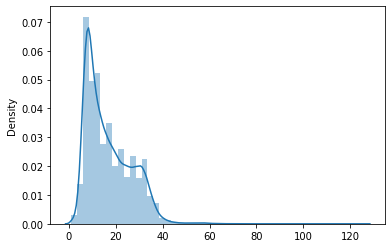

In [ ]:
sns.distplot(train_lengths)

In [ ]:
# видим большие выбросы в данных
# 97% наших текстов не больше вот стольки токенов
np.percentile(train_lengths, 95)

34.0

In [ ]:
class TextClassificationDataset(Dataset):
    
    def __init__(self, texts, targets, vocab, pad_index=0, max_length=32):
        super().__init__()
        
        self.texts = texts
        self.targets = targets
        self.vocab = vocab
        
        self.pad_index = pad_index
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def tokenization(self, text):
        
        tokens = wordpunct_tokenize(text)
        
        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]
        
        return token_indices
    
    def padding(self, tokenized_text):
        
        tokenized_text = tokenized_text[:self.max_length]
        
        tokenized_text += [self.pad_index] * (self.max_length - len(tokenized_text))
        
        return tokenized_text
    
    def __getitem__(self, index):
        
        text = self.texts[index]        
        target = self.targets[index]
        
        tokenized_text = self.tokenization(text)
        tokenized_text = self.padding(tokenized_text)
        
        tokenized_text = torch.tensor(tokenized_text)
        
        return tokenized_text, target

In [ ]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [ ]:
x, y = train_dataset[0]
x

tensor([   55,    29,    98,    15,     8,   273, 24452,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [ ]:
[index2token[idx.item()] for idx in x]

['will',
 'this',
 'work',
 'for',
 'a',
 '2012',
 'forrester',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD']

In [ ]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)
valid_dataset = TextClassificationDataset(texts=valid_x, targets=valid_y, vocab=vocab)

train_loader = DataLoader(train_dataset, batch_size=128)
valid_loader = DataLoader(valid_dataset, batch_size=128)

In [ ]:
for x, y in train_loader:
    break

In [ ]:
x.shape, y.shape

(torch.Size([128, 32]), torch.Size([128]))

### Как мы можем задавать слои

In [ ]:
from torch import nn

In [ ]:
embedding_layer = nn.Embedding(num_embeddings=len(vocab), 
                               embedding_dim=embeddings.shape[-1],
                               padding_idx=0)

In [ ]:
x_embed = embedding_layer(x)

In [ ]:
x_embed

tensor([[[-0.7888,  0.0538,  0.7827,  ...,  0.0631, -0.2181, -0.7005],
         [ 0.2310,  0.1053, -0.5431,  ..., -1.6160, -1.0184, -0.9869],
         [ 0.7572,  0.4440, -0.4680,  ..., -1.7008,  1.6850, -0.7056],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-1.5577, -0.1420,  0.0814,  ..., -0.6042, -0.4391, -0.7208],
         [ 0.0509,  0.0791,  0.0914,  ..., -0.0962,  0.8209,  0.4767],
         [-0.1918, -1.9683,  0.7688,  ...,  0.7163, -1.4591,  1.5034],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.5636, -1.4122, -0.3589,  ...,  0.5257, -0.2783,  1.0855],
         [ 0.9529, -1.0963, -0.2895,  ..., -1

In [ ]:
x_embed.shape

torch.Size([128, 32, 300])

### Но мы ведь прочитали нашу матрицу эмбеддингов
Таким образом она инициализируется предобученными весами.  
При такой инициализации по умолчанию она замораживается, внутри ```.from_pretrained(embeddings, padding_idx=0)``` есть флаг ```freeze```, который отвечает за необходимость заморозки весов. То есть эти веса в процессе обучения не будут обновляться.

In [ ]:
embeddings = torch.tensor(embeddings).float()

In [ ]:
embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)

In [ ]:
x_embed = embedding_layer(x)

In [ ]:
x_embed

### Немного LSTM
Ниже будет про ```batch_first=True```

In [ ]:
lstm = nn.LSTM(input_size=300, hidden_size=128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)

In [ ]:
x_lstm, _ = lstm(x_embed)

In [ ]:
# 256 потому что это конкатенация лстмки, которая прочитала текст слева направо
# и лстмки, которая прочитала текст справа налево
x_lstm.shape

torch.Size([128, 32, 256])

In [ ]:
# избавились от временной размерности
x_lstm.mean(dim=1).shape

torch.Size([128, 256])

### Сделаем свою сеть
В первой домашке в конце есть более подробная информация почему мы используем классы.

In [ ]:
class DeepAverageNetwork(nn.Module):
    
    def __init__(self, embeddings, linear_1_size, linear_2_size, n_classes):
        super().__init__()
        
        self.embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)
        
        self.batch_norm = nn.BatchNorm1d(num_features=embeddings.shape[-1])
        
        self.linear_1 = nn.Linear(in_features=embeddings.shape[-1], out_features=linear_1_size)
        self.linear_2 = nn.Linear(in_features=linear_1_size, out_features=linear_2_size)
        self.linear_3 = nn.Linear(in_features=linear_2_size, out_features=n_classes)
        
    def forward(self, x):
        
        # переводим индексы слов в эмбеддинги этих слов
        # (batch_size, sequence_length) -> (batch_size, sequence_length, embedding_dim)

        x = self.embedding_layer(x)
        
        # агрегируем наши эмбеддинги по размерности время
        # (batch_size, sequence_length, embedding_dim) -> (batch_size, embedding_dim)
        x = x.sum(dim=1)
        
        # делаем нормирование
        # (batch_size, embedding_dim) -> (batch_size, embedding_dim)
        x = self.batch_norm(x)
        
        # прогоняем через первый линейный слой
        # (batch_size, embedding_dim) -> (batch_size, linear_1_size)
        x = self.linear_1(x)
        
        # применяем нелинейность
        # (batch_size, linear_1_size) -> (batch_size, linear_1_size)
        x = torch.relu(x)
        
        # прогоняем через второй линейный слой
        # (batch_size, linear_1_size) -> (batch_size, linear_2_size)
        x = self.linear_2(x)
        
        # применяем нелинейность
        # (batch_size, linear_2_size) -> (batch_size, linear_2_size)
        x = torch.relu(x)
        
        # переводим с помощью линейного преобразования в количество классов
        # (batch_size, linear_2_size) -> (batch_size, n_classes)
        x = self.linear_3(x)
        
        ## по идеи здесь должен был быть софтмакс
        ## но мы будем использовать лосс nn.CrossEntropyLoss()
        ## в его документации написано
        ## This criterion combines :func:`nn.LogSoftmax` and :func:`nn.NLLLoss` in one single class.
        ## это некоторая оптимизация, которая включает в себя сразу и софтмакс и сам negative log likelihood лосс
        ## так как у нас в лоссе есть софтмакс, то мы не будем применять его в сетке
        ## на этапе предсказания (а не обучения) мы будем отдельно делать софтмакс для получения распределения классов
        ## 
        ## (batch_size, n_classes) -> (batch_size, n_classes)
        # x = torch.softmax(x, dim=-1)
        
        return x

In [ ]:
model = DeepAverageNetwork(embeddings=embeddings,
                           linear_1_size=256, 
                           linear_2_size=128, 
                           n_classes=len(category2index))

In [ ]:
criterion = nn.CrossEntropyLoss()
# задайте оптимизатор
# optimizer = ...
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

### Напишите цикл обучения
Что он должен в себя включать:
1. Получение предсказаний модели
1. Расчет функции потерь
1. Расчет градиентов
1. Шаг градиентного спуска
1. Обнуление градиентов
1. Записывание значения лосса

In [ ]:
train_losses = list()

# в обучении моделей у нас есть такая ситуация, что некоторые слои ведут себя по разному на этапе тренировки и предсказания
# например, батч норм (а так же все остальные нормировки) и дропаут
# это переводит модель в режим тренировки
model.train()

progress_bar = tqdm(total=len(train_loader.dataset), desc=f'Train epoch: {n_epoch + 1}')

for x, y in train_loader:
        
    optimizer.zero_grad()
        
    pred = model(x)
        
    loss = criterion(pred, y.float())
        
    loss.backward()
        
    optimizer.step()
      
    train_losses.append(loss.item())
    losses.append(loss.item())

    progress_bar.set_postfix(train_loss = np.mean(losses[-10:]))
    progress_bar.update(x.shape[0])
    progress_bar.close()


### Напишите цикл валидации
Что он должен в себя включать:
1. Получение предсказаний модели
1. Расчет функции потерь
1. Записывание значения лосса

Также с помощью контекста ```with torch.no_grad():``` можно явно указать торчу не сохранять необходимые параметры для расчета градиентов. Обязательно для режима предсказания.

In [ ]:
losses = list()
valid_losses = list()
# это переводит модель в режим предсказания
# то есть фиксируются статистики батч норма, дропаут не выкидывает фичи
model.eval()

# заметьте, что мы поменяли наш лоадер на валидационный
for x, y in valid_loader:
    
    with torch.no_grad():
        # получение предсказаний модели
        # расчет лосса
            
        pred = model(x)
            
    valid_preds.append(pred.numpy())
    valid_targets.append(y.numpy())

    loss = criterion(pred, y)
    valid_losses.append(loss.item())
        
    mean_val_loss = np.mean(valid_losses)


### Проведите обучение несколько эпох
Одна эпоха - это один проход по датасету.  
Шаги:
- Поменяйте что-нибудь в модели, добавить дропаут и тд
- Остановите обучение с помощью early stopping
- Добавьте расчет метрик во время обучения и предсказания (например, micro F1). Чтобы это сделать вы можете, например, сохранять предсказания модели
- После обучения нарисуйте как по мере обучения меняется функция потерь на тренировочном и валидационном датасете, как меняется метрики
- Опционально: постройте confusion matrix

Подсказки:
- Чтобы корректно сохранять предсказания нужно переменную отсоединить от графа, то есть сделать ```x.detach()```

In [ ]:
for instance in list(tqdm._instances):
  tqdm._decr_instances(instance)

In [ ]:
best_val_loss = 10.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
losses = list()

for n_epoch in range(10):
    train_losses = list()
    valid_losses = list()
    valid_preds = list() #для f-меры
    valid_targets = list() #для f-меры

    model.train()
    
    train_progress_bar = tqdm(total=len(train_loader.dataset), desc=f'Epoch: {n_epoch + 1}, train')
    valid_progress_bar = tqdm(total=len(valid_loader.dataset), desc=f'Epoch: {n_epoch + 1}, validation')
    
    for x, y in train_loader:

        optimizer.zero_grad()
            
        pred = model(x.detach())
            
        loss = criterion(pred, y.squeeze())
            
        loss.backward()
            
        optimizer.step()
          
        train_losses.append(loss.item())
        losses.append(loss.item())

        train_progress_bar.set_postfix(train_loss = np.mean(train_losses[-500:]))
        train_progress_bar.update(x.shape[0])
        for instance in list(tqdm._instances):
          tqdm._decr_instances(instance)

    train_progress_bar.close()

    model.eval()

    valid_progress_bar = tqdm(total=len(valid_loader.dataset), desc=f'Epoch: {n_epoch + 1}, validation')

    for x, y in valid_loader:
        
        with torch.no_grad():  
            pred = model(x.detach())
                
        valid_preds.append(pred.numpy())
        valid_targets.append(y.numpy())

        loss = criterion(pred, y.squeeze())
        valid_losses.append(loss.item())

        valid_progress_bar.set_postfix(valid_loss = np.mean(valid_losses[-500:]))
        valid_progress_bar.update(x.shape[0])
        for instance in list(tqdm._instances):
          tqdm._decr_instances(instance)
    
    valid_progress_bar.close()
        
    mean_val_loss = np.mean(valid_losses)

    if mean_val_loss < best_val_loss:
        best_val_loss = mean_val_loss
    else:
        print(f'Early stopping on epoch {n_epoch+1}')
        break

Epoch: 4, validation: 100%|██████████| 50000/50000 [00:04<00:00, 11325.45it/s, valid_loss=0.996]

Early stopping on epoch 4


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
losses

Text(0, 0.5, 'Loss function')

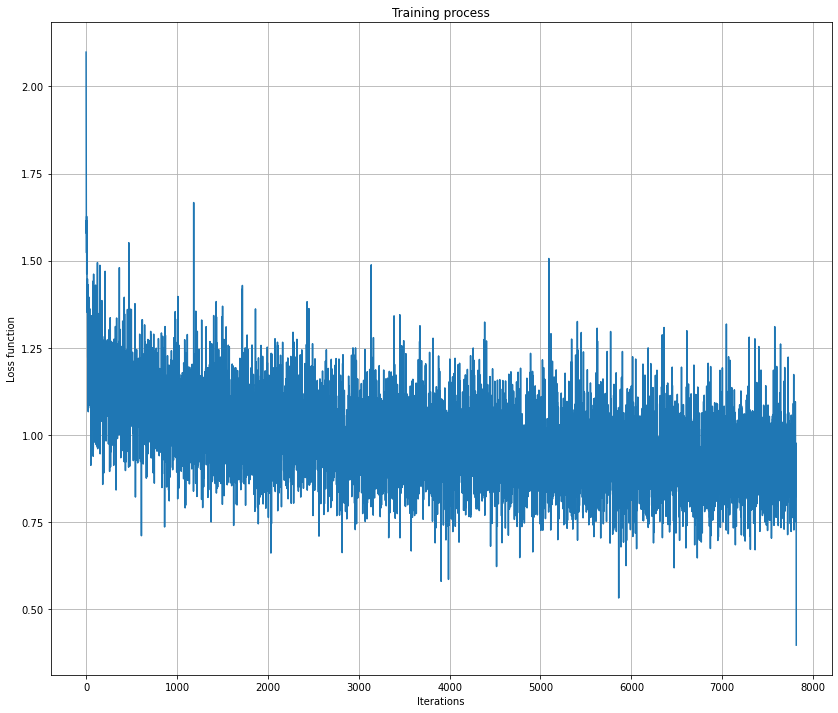

In [ ]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Loss function')

### Важные и не очень интуитивные моменты про LSTM и CNN в торче

По умолчанию LSTM принимает данные с такой размерностью:
```python
(seq_len, batch, input_size)
```
Сделано это с целью оптимизации на более низком уровне.  
Мы оперируем такими объектами:
```python
(batch, seq_len, input_size)
```
Чтобы LSTM у нас заработала правильно, мы можем либо передать параметр ```batch_first=True``` во время инициализации слоя,
либо транспонировать (поменять) первую и вторую размерность у нашего x перед подачей в слой.  
[Подробнее про LSTM](https://pytorch.org/docs/stable/nn.html#lstm)

- 128 - размер батча
- 64 - длина последовательности (количество слов)
- 1024 - эмбеддинг слова

In [ ]:
x = torch.rand(128, 64, 1024)

In [ ]:
# первый способ
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

pred, mem = lstm(x)

In [ ]:
pred.shape

In [ ]:
# второй способ
lstm = torch.nn.LSTM(1024, 512)

# меняем размерность batch и seq_len местами
x_transposed = x.transpose(0, 1)
pred_transposed, mem = lstm(x_transposed)

In [ ]:
# у нас все еще осталась размерность (seq_len, batch, input_size)
pred_transposed.shape

In [ ]:
# просто транспонируем еще раз
pred = pred_transposed.transpose(0, 1)
pred.shape

### Conv1d & MaxPool1d
Примерно такая же ситуация происходит со сверточными слоями и пулингами.  
1d реализация как раз для текстов, в ней матрица-фильтр ходит только по одной размерности.  
[Подробнее про CNN](https://pytorch.org/docs/stable/nn.html#conv1d)  
[Подробнее про пулинг](https://pytorch.org/docs/stable/nn.html#maxpool1d)  
Ожидается такая размерность:
```python
(batch, input_size, seq_len)
```
Мы все еще хоти подавать такую размерность:
```python
(batch, seq_len, input_size)
```
В случае со свертками и пулингами у нас есть вариант только транспонировать x перед подачей и транспонировать полученный результат. Обратите внимание, что транспонируем мы первую и вторую размерность (индексация с нуля).

In [ ]:
x.shape

torch.Size([128, 64, 1024])

In [ ]:
# in_channels - размер входных эмбеддингов
# out_channels - количество/какой размер эмбеддингов мы хотим получить
# kernel_size - размер окна/н-граммы
cnn = torch.nn.Conv1d(in_channels=1024, out_channels=512, kernel_size=3)

In [ ]:
# выпадет ошибка, посмотрите какая
pred = cnn(x)

RuntimeError: ignored

In [ ]:
x_transposed = x.transpose(1, 2)
x_transposed.shape
# перевели в (batch, input_size, seq_len)

torch.Size([128, 1024, 64])

In [ ]:
pred_transposed = cnn(x_transposed)
pred_transposed.shape
# осталась разрмерность (batch, output_size, seq_len)

torch.Size([128, 512, 62])

In [ ]:
# переведем обратно в (batch, seq_len, input_size)
pred = pred_transposed.transpose(1, 2)
pred.shape

torch.Size([128, 62, 512])

### Еще важный момент про LSTM

The input can also be a packed variable length sequence. See [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) or [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) for details.

Это внутренняя конструкция торча, которая позволяет не читать токен ```PAD```, но все еще работать с батчами. То есть внутри батча мы можем передать лстмке, что у нас данные переменной длины. Не забудьте что на выход отдается [torch.nn.utils.rnn.PackedSequence](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.PackedSequence).

## Домашнее задание

1. Сделать класс нейронки, вписать необходимые операции, архитектура ниже
1. Написать обучалку (обобщить то, что было выше)
1. Добавить логирование
    1. Сохранять лосс на каждой итерции обучения __0.25 балла__
    1. Каждую эпоху сохранять лосс трейна и тест __0.25 балла__
    1. Каждую эпоху рассчитывать метрики __0.25 балла__
    1. Добавить прогресс бар, в котором показывается усредненный лосс последних 500-та итераций __0.25 балла__
1. Добавить early stopping __0.5 балла__
1. Нарисовать графики лосса, метрик, конфьюжин матрицу __0.5 балла__


### Архитектура (что можно попробовать)
1. Предобученные эмбеддинги. Почитайте [здесь](https://pytorch.org/docs/stable/nn.html#embedding) (from_pretrained) как вставить свои эмбеддинги, выше мы читали матрицу эмбеддингов. __0 баллов__
1. Дообучить эмбеддинги отдельно от сети. __2 балла__
1. Дообучить эмбеддинги вместе с сетью и с другим learning rate (указывается в оптимизаторе). __2 балла__
1. Bidirectional LSTM. __1 балл__
1. Несколько параллельных CNN с разными размерами окна и mean/max over time пулингами к ним и дальнейшей конкатенацией. __2 балла__
1. Несколько последовательных CNN. __1 балла__
1. Разные окна и residual к предыдущему пункту. __2 балла__
1. Предыдущий пункт сделан без ошибок (замаскированы свертки паддингов). __2 балла__
1. Написать правильный правильный mean/max пулинг, который не учитывает паддинги, точнее их маскирует. __2 балла__
1. Добавить [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) и [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) для LSTM. Инфа [здесь](#Еще-важный-момент-про-LSTM) __2 балла__
1. Добавить spatial дропаут для входа LSTM (не просто стандартный пункт при инициализации LSTM) __1 балл__
1. Добавить BatchNorm/LayerNorm/Dropout/Residual/etc __1 балл__
1. Добавить шедуллер __1 балл__
1. Обучать на GPU __2 балла__
1. Сделать transfer learning с собственно обученной языковой модели, обученной на любых данных, например, unlabeled. __7 баллов__
1. your madness

## 10 баллов максимум

# По итогам напишите результаты экспериментов
# Что получилось, а что нет
# Почему, выводы

Сделать класс нейронки, вписать необходимые операции

### Неудачная попытка сделать параллельные свертки

In [ ]:
class MyNetworkConcatenateTries(nn.Module):
    
    def __init__(self, embeddings, linear_1_size, linear_2_size, n_classes):
        super().__init__()
        
        self.embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0, freeze=False)
        
        self.input_size = embeddings.shape[-1]
        self.conv_size = int(self.input_size/2)
        self.padding = nn.ConstantPad1d(padding=1, value=float('-inf'))

        self.conv1 = nn.Conv1d(in_channels=self.input_size, out_channels=self.conv_size, kernel_size=5, stride=1, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=1, padding=1)

        self.conv2 = nn.Conv1d(in_channels=self.input_size, out_channels=self.conv_size, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)

        self.batch_norm = nn.BatchNorm1d(num_features=self.conv_size)
        self.relu = nn.ReLU()
        self.linear_1 = nn.Linear(in_features=self.conv_size, out_features=linear_1_size)
        self.linear_2 = nn.Linear(in_features=linear_1_size, out_features=linear_2_size)
        self.linear_3 = nn.Linear(in_features=linear_2_size, out_features=n_classes)
        
    def forward(self, x):
        
        x = self.embedding_layer(x)

        x = x.transpose(1, 2)
        x = self.padding(x)

        x1 = self.conv1(x)
        x1 = self.batch_norm(x1)
        x1 = self.relu(x1)
        x1 = self.pool1(x1)
        # x1 = x1.transpose(1, 2)

        x2 = self.conv2(x)
        x2 = self.batch_norm(x2)
        x2 = self.relu(x2)
        x2 = self.pool2(x2)
        # x2 = x2.transpose(1, 2)

        concat_x = torch.cat((x1, x2), dim=0) # ошибка с размерностями при dim=0 и dim=1

        x = concat_x.transpose(1, 2)
        x = torch.flatten(x, 1)
        # x = concat_x.sum(dim=1)

        x = self.batch_norm(x)
        
        x = self.linear_1(x)
        x = torch.relu(x)
        x = self.linear_2(x)
        x = torch.relu(x)
        x = self.linear_3(x)
        
        
        return x


### Удачная попытка сделать последовательные свертки

- [x]  Сделать класс нейронки, вписать необходимые операции, архитектура ниже
- [x]  Написать обучалку (обобщить то, что было выше)
- [x]  Добавить логирование
    - [x]  Сохранять лосс на каждой итерции обучения **0.25 балла**
    - [x]  Каждую эпоху сохранять лосс трейна и тест **0.25 балла**
    - [x]  Каждую эпоху рассчитывать метрики **0.25 балла**
    - [x]  Добавить прогресс бар, в котором показывается усредненный лосс последних 500-та итераций **0.25 балла**
- [x]  Добавить early stopping **0.5 балла**
- [x]  Нарисовать графики лосса, метрик, конфьюжин матрицу **0.5 балла**
- [x]  Дообучить эмбеддинги вместе с сетью и с другим learning rate (указывается в оптимизаторе). **2 балла**
- [x]  Несколько последовательных CNN. **1 балла**
- [x]  Добавить шедуллер **1 балл**
- [x]  Обучать на GPU **2 балла**
- [x]  Добавить BatchNorm [/ LayerNorm / Dropout / Residual / etc]) **1 балл**


In [ ]:
class MySimpleNetwork(nn.Module):
    
    def __init__(self, embeddings, linear_1_size, linear_2_size, n_classes):
        super().__init__()
        
        self.embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0, freeze=False)

        self.input_size = embeddings.shape[-1]
        self.conv_size_1 = int(self.input_size/2)
        self.conv_size_2 = int(self.conv_size_1/2)

        self.conv1 = nn.Conv1d(in_channels=self.input_size, out_channels=self.conv_size_1, kernel_size=3, stride=1, padding=0)
        self.pool1 = nn.MaxPool1d(kernel_size=3, stride=1, padding=0)
        self.conv2 = nn.Conv1d(in_channels=self.conv_size_1, out_channels=self.conv_size_2, kernel_size=3, stride=1, padding=0)
        self.pool2 = nn.MaxPool1d(kernel_size=3, stride=1, padding=0)

        self.batch_norm1 = nn.BatchNorm1d(num_features=self.conv_size_1)
        self.batch_norm2 = nn.BatchNorm1d(num_features=self.conv_size_2)
        self.batch_norm = nn.BatchNorm1d(num_features=self.conv_size_2)

        self.relu = nn.ReLU()

        self.linear_1 = nn.Linear(in_features=self.conv_size_2, out_features=linear_1_size)
        self.linear_2 = nn.Linear(in_features=linear_1_size, out_features=linear_2_size)
        self.linear_3 = nn.Linear(in_features=linear_2_size, out_features=n_classes)


    def forward(self, x):

        x = self.embedding_layer(x)

        x = x.transpose(1, 2)

        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.pool2(x)

        x = x.transpose(1, 2)

        x = x.sum(dim=1)

        x = self.batch_norm(x)

        x = self.linear_1(x)
        x = self.relu(x)
        # x = torch.relu(x)
        x = self.linear_2(x)
        x = self.relu(x)
        # x = torch.relu(x)
        x = self.linear_3(x)
             
        return x


In [ ]:
assert torch.cuda.is_available()
device = torch.device('cuda')

In [ ]:
model = MySimpleNetwork(embeddings=embeddings,
                           linear_1_size=256, 
                           linear_2_size=128, 
                           n_classes=len(category2index))
model.to(device)

MySimpleNetwork(
  (embedding_layer): Embedding(100000, 300, padding_idx=0)
  (conv1): Conv1d(300, 150, kernel_size=(3,), stride=(1,))
  (pool1): MaxPool1d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(150, 75, kernel_size=(3,), stride=(1,))
  (pool2): MaxPool1d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (batch_norm1): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (linear_1): Linear(in_features=75, out_features=256, bias=True)
  (linear_2): Linear(in_features=256, out_features=128, bias=True)
  (linear_3): Linear(in_features=128, out_features=8, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import f1_score

In [ ]:
model_params = [x[1] for x in list(filter(lambda x: x[0] != 'embedding_layer.weight', model.named_parameters()))]
embedding_params = model.embedding_layer.parameters()

In [ ]:
%%time
best_val_loss = 10.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=[{'params': embedding_params, 'lr': 0.00001}, {'params': model_params, 'lr': 0.0001}])
losses = list()
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
mean_f_scores_train = list()
mean_f_scores_valid = list()

for n_epoch in range(10):
    train_losses = list()
    valid_losses = list()
    
    f_scores_train = list()
    f_scores_valid = list()

    model.train()
    
    train_progress_bar = tqdm(total=len(train_loader.dataset), desc=f'Epoch: {n_epoch + 1}, train')
    
    for instance in list(tqdm._instances):
      tqdm._decr_instances(instance)

    for x, y in train_loader:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
            
        pred = model(x.detach())
        
        f_scores_train.append(f1_score(y.cpu(), pred.cpu().argmax(1), average='micro'))

        loss = criterion(pred.squeeze(), y)
            
        loss.backward()
            
        optimizer.step()

        train_losses.append(loss.item())
        losses.append(loss.item())

        train_progress_bar.set_postfix(train_loss = np.mean(train_losses[-500:]))
        train_progress_bar.update(x.shape[0])

    train_progress_bar.close()

    model.eval()

    valid_progress_bar = tqdm(total=len(valid_loader.dataset), desc=f'Epoch: {n_epoch + 1}, validation')

    for instance in list(tqdm._instances):
      tqdm._decr_instances(instance)

    for x, y in valid_loader:

        x = x.to(device)
        y = y.to(device)

        with torch.no_grad():  
            pred = model(x.detach())
       
        f_scores_valid.append(f1_score(y.cpu(), pred.cpu().argmax(1), average='micro'))

        loss = criterion(pred.squeeze(), y)
        valid_losses.append(loss.item())

        valid_progress_bar.set_postfix(valid_loss = np.mean(valid_losses[-500:]))
        valid_progress_bar.update(x.shape[0])
    
    valid_progress_bar.close()

    mean_val_loss = np.mean(valid_losses)

    mean_f_scores_train.append(np.mean(f_scores_train))
    mean_f_scores_valid.append(np.mean(f_scores_valid))

    scheduler.step()

    if mean_val_loss < best_val_loss:
        best_val_loss = mean_val_loss
    else:
        print(f'Early stopping on epoch {n_epoch+1}')
        break


Epoch: 5, validation: 100%|██████████| 50000/50000 [00:03<00:00, 15616.24it/s, valid_loss=0.887]

Early stopping on epoch 5
CPU times: user 2min 18s, sys: 22.5 s, total: 2min 41s
Wall time: 2min 34s


In [ ]:
import matplotlib.pyplot as plt

Графики f-меры на трейне и валидации

Text(0, 0.5, 'f-score')

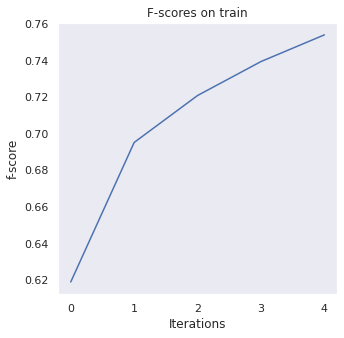

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(mean_f_scores_train)
plt.grid()
plt.title('F-scores on train')
plt.xlabel('Iterations')
plt.ylabel('f-score')

Text(0, 0.5, 'f-score')

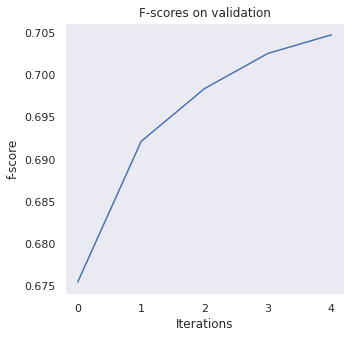

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(mean_f_scores_valid)
plt.grid()
plt.title('F-scores on validation')
plt.xlabel('Iterations')
plt.ylabel('f-score')

График лосса

Text(0, 0.5, 'Loss function')

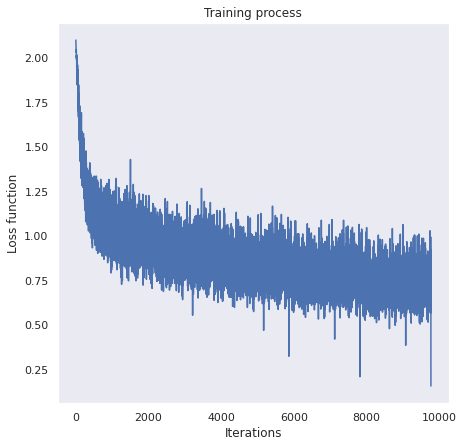

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Loss function')

Конфьюжн матрица со значениями валидации

In [ ]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

In [ ]:
model.eval()
y_true = list()
y_pred = list()
for x, y in valid_loader:
  x = x.to(device)
  y = y.to(device)
  with torch.no_grad():
    pred = model.forward(x)
    pred = torch.softmax(pred, dim=-1)
    y_pred.extend(pred.cpu().argmax(1))
    y_true.extend(y.cpu())

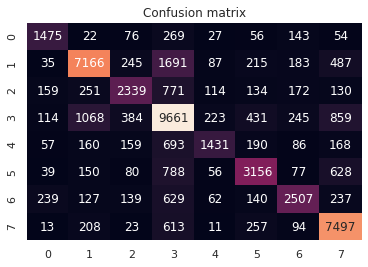

In [ ]:
sns.heatmap(data=confusion_matrix(y_true, y_pred), annot=True, fmt="d", cbar=False, xticklabels=category2index.values(), yticklabels=category2index.values())
plt.title("Confusion matrix")
plt.show()